# Bike Sharing Dataset Modellazione Lineare

### Obbiettivo
L'obbiettivo che ci poniamo è quello di prevedere il numero di biciclette che verranno noleggiate

## Importo librerie

In [1]:
%matplotlib inline
# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn


sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

## Carico Dataset

In [2]:
hour_df = pd.read_csv('hour.csv')
#fonte dataset(https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [3]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Preprocessing
+ Standardizzo nome delle colonne
+ Typecast attributi
+ Encode Categoricals usando One Hot Encoding

### Standardizzo nome colonne

In [4]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [5]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Typecast  degli Attributi

In [6]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')

hour_df

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Divisione Train-Test

In [7]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


## Normality Test

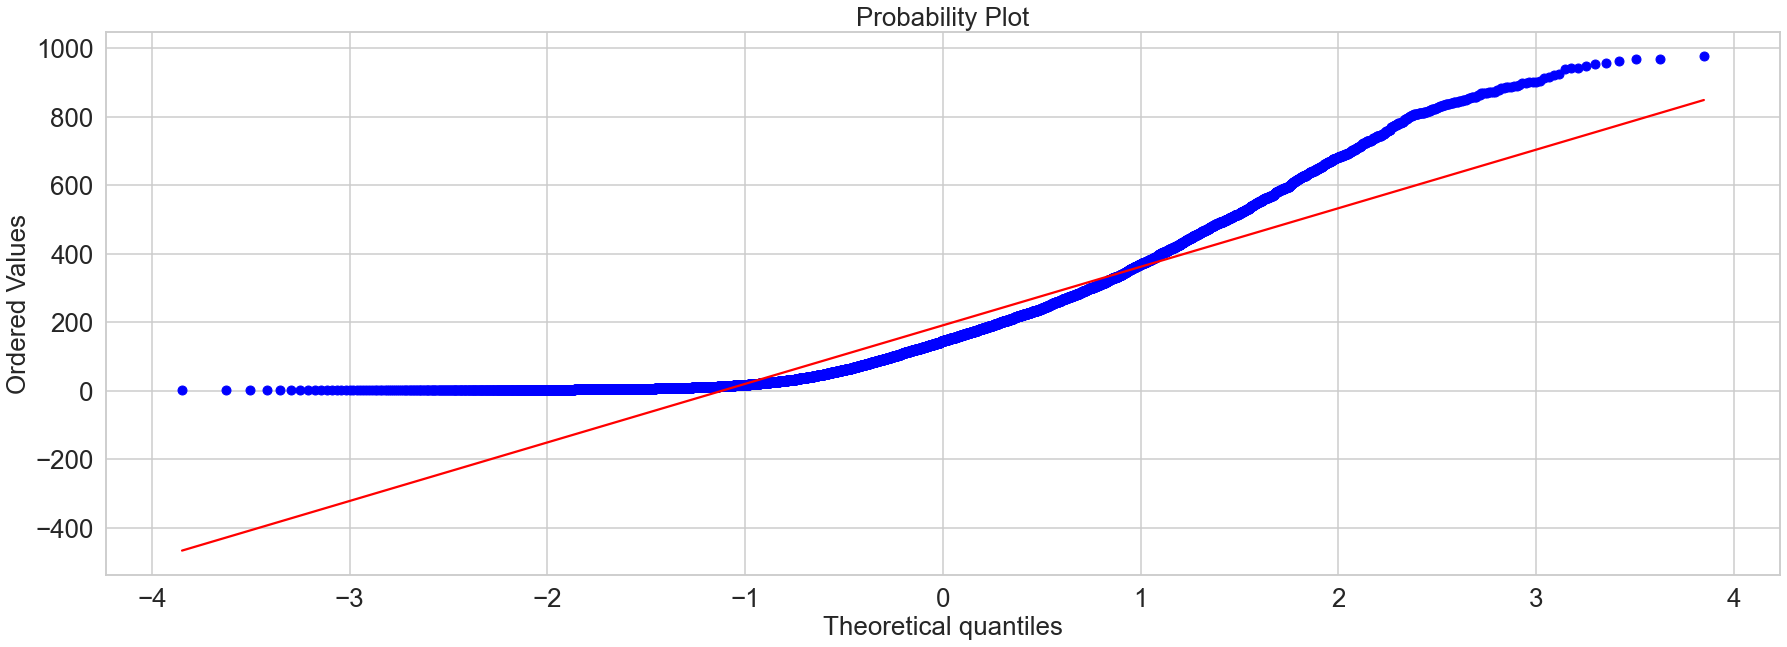

In [8]:
stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

In [9]:
all_features =  ['temp','humidity','windspeed','hour','weekday',
                'month','year','season','is_holiday','weather_condition','is_workingday']

In [10]:
X= pd.get_dummies(X[all_features])
X

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.64,0.65,0.1940,0,5,9,0,0,0,1,0,1,0,1,0,0,0,0,1
1,0.50,0.45,0.2239,13,2,3,0,0,1,0,0,1,0,1,0,0,0,0,1
2,0.86,0.47,0.5224,12,0,8,1,0,0,1,0,1,0,1,0,0,0,1,0
3,0.30,0.61,0.0000,2,3,2,1,1,0,0,0,1,0,1,0,0,0,0,1
4,0.54,0.19,0.4179,17,6,4,1,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638,0.46,0.88,0.0896,9,5,4,1,0,1,0,0,1,0,1,0,0,0,0,1
11639,0.66,0.34,0.1343,17,5,5,1,0,1,0,0,1,0,1,0,0,0,0,1
11640,0.80,0.43,0.2836,12,3,8,0,0,0,1,0,1,0,1,0,0,0,0,1
11641,0.24,0.65,0.4179,7,2,2,0,1,0,0,0,1,0,1,0,0,0,0,1


## Linear Regression

In [11]:
y= y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

### Cross Validation

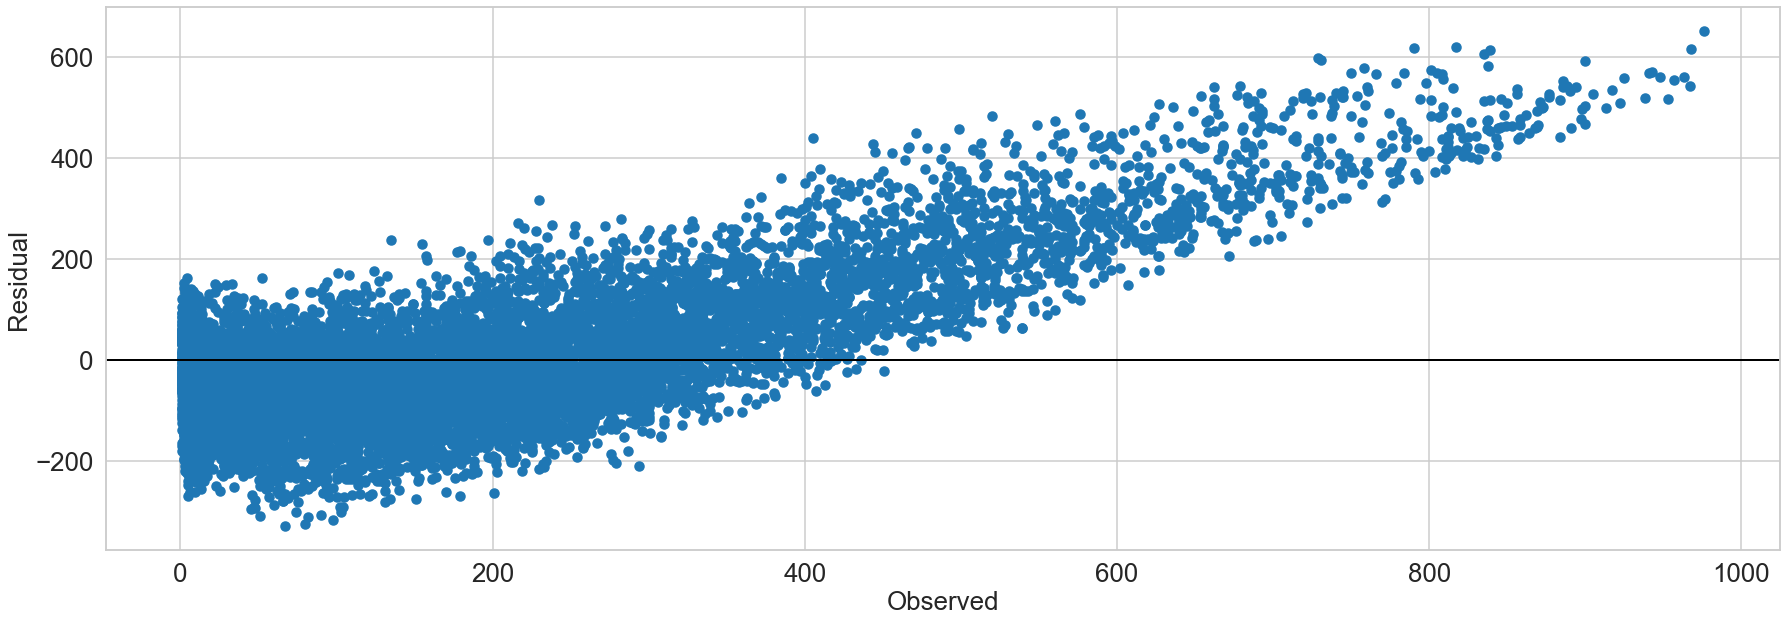

In [12]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [13]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

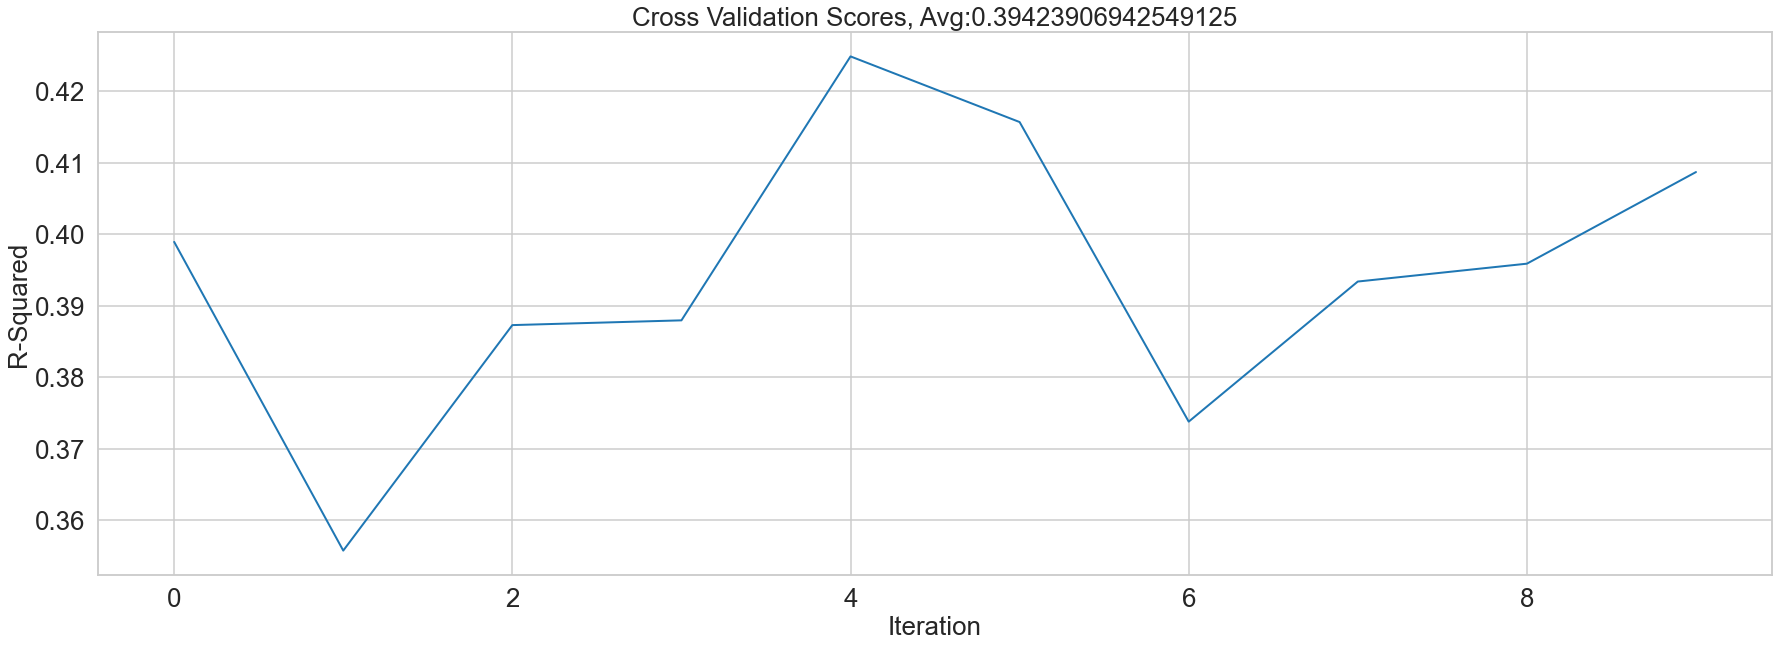

In [14]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [15]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.39894459 0.35575732 0.3873037  0.38796861 0.42489499 0.41571164
 0.37379762 0.39339864 0.39589746 0.40871611]
MSE::[-19612.38349313 -20800.77110185 -20256.54013607 -18545.99033804
 -18746.57816436 -21015.35560028 -21549.12876053 -21567.27946203
 -21044.42416385 -18899.05989574]


In [16]:
lin_reg.fit(X,y)

LinearRegression()

## Test Dataset Performance

In [17]:
X_test = pd.get_dummies(X_test[all_features])
X_test

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0,0,1,0,1,0,1,0,0,0,1,0
1,0.24,0.41,0.2239,20,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0
2,0.32,0.66,0.2836,2,5,10,0,0,0,0,1,1,0,1,0,0,0,0,1
3,0.78,0.52,0.3582,19,2,5,1,0,1,0,0,1,0,1,0,0,0,0,1
4,0.26,0.56,0.3881,0,4,1,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,0.62,1.00,0.1045,10,5,9,0,0,0,0,1,1,0,0,0,1,0,0,1
5732,0.28,0.81,0.1642,7,5,12,1,0,0,0,1,1,0,0,0,1,0,0,1
5733,0.34,0.46,0.0896,14,0,2,0,1,0,0,0,1,0,1,0,0,0,1,0
5734,0.72,0.37,0.0000,16,5,10,1,0,0,0,1,1,0,1,0,0,0,0,1


In [18]:
y_test = y_test.total_count.values.reshape(-1,1)

y_pred = lin_reg.predict(X_test)

residuals = y_test-y_pred

In [19]:
r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("MAE aggiunta io interessante: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))

R-squared::0.4024409682673429
MSE: 19063.00
MAE aggiunta io interessante: 104.32


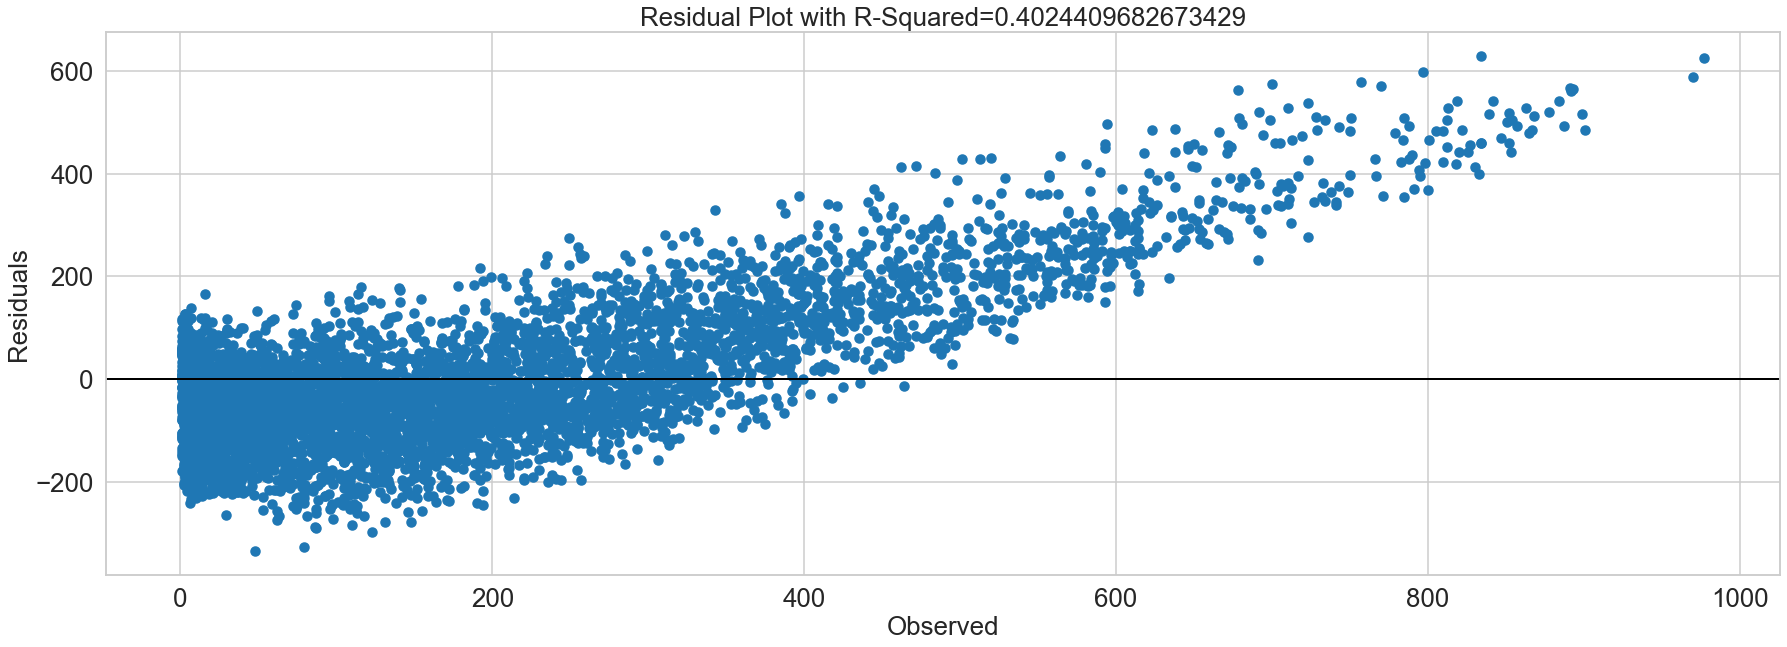

In [20]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

## Stats Models

In [21]:
import statsmodels.api as sm

# Set the independent variable
X = X.values.tolist()

# This handles the intercept. 
# Statsmodel takes 0 intercept by default
X = sm.add_constant(X)

X_test = X_test.values.tolist()
X_test = sm.add_constant(X_test)


# Build OLS model
model = sm.OLS(y, X)
results = model.fit()

# Get the predicted values for dependent variable
pred_y = results.predict(X_test)

# View Model stats
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     508.2
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:31:24   Log-Likelihood:                -74221.
No. Observations:               11643   AIC:                         1.485e+05
Df Residuals:                   11627   BIC:                         1.486e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3509     11.086     -0.122      0.9

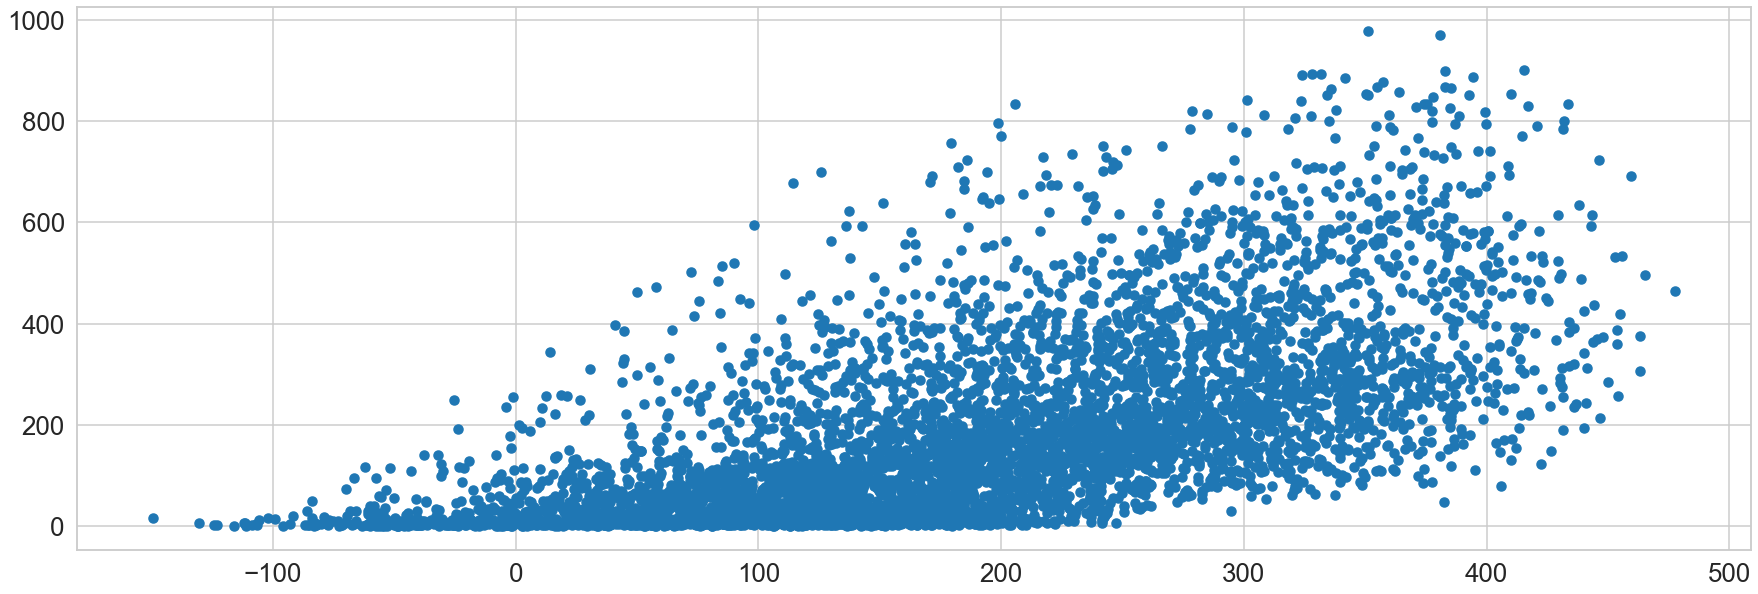

In [22]:
plt.scatter(pred_y,y_test)